## Capstone Project
### Question  1. Project Challenge Details and Setup 

Problem Statement

The people of New Yorker use the 311 system to report complaints about the non-emergency problems to local authorities. Various agencies in New York are assigned these problems. The Department of Housing Preservation and Development of New York City is the agency that processes 311 complaints that are related to housing and buildings.

In the last few years, the number of 311 complaints coming to the Department of Housing Preservation and Development has increased significantly. Although these complaints are not necessarily urgent, the large volume of complaints and the sudden increase is impacting the overall efficiency of operations of the agency.

Therefore, the Department of Housing Preservation and Development has approached your organization to help them manage the large volume of 311 complaints they are receiving every year.

The agency needs answers to several questions. The answers to those questions must be supported by data and analytics. These are their  questions:

##### 1. Which type of complaint should the Department of Housing Preservation and Development of New York City focus on first?
##### 2. Should the Department of Housing Preservation and Development of New York City focus on any particular set of boroughs, ZIP codes, or street (where the complaints are severe) for the specific type of complaints you identified in response to Question 1?
##### 3. Does the Complaint Type that you identified in response to question 1 have an obvious relationship with any particular characteristic or characteristics of the houses or buildings?
##### 4. Can a predictive model be built for a future prediction of the possibility of complaints of the type that you have identified in response to question 1?

Your organization has assigned you as the lead data scientist to provide the answers to these questions. You need to work on getting answers to them in this Capstone Project by following the standard approach of data science and machine learning.


### Datasets

You will use two datasets from the Department of Housing Preservation and Development of New York City to address their problems.

#### 311 complaint dataset

This dataset is available at https://data.cityofnewyork.us/Social-Services/311-Service-Requests-from-2010-to-Present/erm2-nwe9. You can download part of this data by using SODA API.


Download only the data that is related to the Department of Housing Preservation and Development. Also, restrict your data to the limited number of fields. Otherwise, your data size will be unnecessarily large, and it might not work in the Watson Studio environment. Too much data can also be very slow to process and analyze.

#### PLUTO dataset for housing

This dataset for housing can be accessed from https://data.cityofnewyork.us/City-Government/Primary-Land-Use-Tax-Lot-Output-PLUTO-/xuk2-nczf. After you download the data, use only the part that is specific to the borough that you are interested in based on your analysis.

### What Is the Top Complaint Type?

The goal of this exercise is to find the answer to the Question 1 of the problem statement:

#### Which type of complaint should the Department of Housing Preservation and Development of New York City focus on first?

In this exercise, you need to read back the 311 datasets that you stored in Cloud Object Store and explore the dataset.

By the end of this exercise, you need to figure out the correct Complaint Type that the Department of Housing Preservation and Development of New York City should focus on.


Notebook steps:
* install required packages
* import packages required for this notebook
* read the complaints dataset
* group the data by complaint_type to look at counts
* show the resulting dataframe using bar chart to look at distribution
* show the results using a pie chart
* conclusion


#### Import Python packages to be used

In [1]:

import pandas as pd
import datetime as dt
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np



The data has been downloaded from https://data.cityofnewyork.us/Social-Services/311-Service-Requests-from-2010-to-Present/erm2-nwe9
The instructions to "Download only the data that is related to the Department of Housing Preservation and Development." were followed.


Read dataset.

In [2]:
# The code was removed by Watson Studio for sharing.

In [3]:
# The code was removed by Watson Studio for sharing.

,created_date,unique_key,complaint_type,incident_zip,incident_address,street_name,address_type,city,resolution_description,borough,latitude,longitude,closed_date,location_type,status
0,2019-09-11 15:54:19,43767067,SAFETY,10024.0,147 WEST 80 STREET,WEST 80 STREET,ADDRESS,NEW YORK,The following complaint conditions are still o...,MANHATTAN,40.783212,-73.976334,NaT,RESIDENTIAL BUILDING,Open
1,2019-09-11 13:49:51,43767116,PLUMBING,11225.0,1585 BEDFORD AVENUE,BEDFORD AVENUE,ADDRESS,BROOKLYN,The following complaint conditions are still o...,BROOKLYN,40.668124,-73.955983,NaT,RESIDENTIAL BUILDING,Open
2,2019-09-11 18:42:14,43765197,SAFETY,10037.0,2300 5 AVENUE,5 AVENUE,ADDRESS,NEW YORK,The following complaint conditions are still o...,MANHATTAN,40.815510,-73.935632,NaT,RESIDENTIAL BUILDING,Open
3,2019-09-11 13:50:49,43764415,DOOR/WINDOW,11233.0,1766 DEAN STREET,DEAN STREET,ADDRESS,BROOKLYN,The following complaint conditions are still o...,BROOKLYN,40.675744,-73.929246,NaT,RESIDENTIAL BUILDING,Open
4,2019-09-11 17:50:31,43765661,UNSANITARY CONDITION,10460.0,2116 HONEYWELL AVENUE,HONEYWELL AVENUE,ADDRESS,BRONX,The following complaint conditions are still o...,BRONX,40.845407,-73.882053,NaT,RESIDENTIAL BUILDING,Open


In [ ]:
df = pd.read_csv('/Users/sravn/Py-R-K8s/CapstoneProject/V3/fhrw-4uyv.csv.gz',
                    compression='gzip',keep_date_col = True, parse_dates=['created_date','closed_date'],infer_datetime_format=True,
                    keep_default_na=False, low_memory=False)

In [2]:
core_df=pd.read_csv('/Users/sravn/Py-R-K8s/CapstoneProject/V3/fhrw-4uyv.csv.gz',
                    compression='gzip',keep_date_col = True, parse_dates=['created_date','closed_date'],infer_datetime_format=True,
                    keep_default_na=False, low_memory=False)

Show number of lines in the file.   
This should only be for Department of Housing Preservation and Development.

In [26]:
print('Number of service requests in New York City : {}'.format(len(df_data_2)))

Number of service requests in New York City : 5854002


In [6]:
df_data_2.head()

,created_date,unique_key,complaint_type,incident_zip,incident_address,street_name,address_type,city,resolution_description,borough,latitude,longitude,closed_date,location_type,status
0,2019-09-11T15:54:19.000,43767067,SAFETY,10024.0,147 WEST 80 STREET,WEST 80 STREET,ADDRESS,NEW YORK,The following complaint conditions are still o...,MANHATTAN,40.783212,-73.976334,NaN,RESIDENTIAL BUILDING,Open
1,2019-09-11T13:49:51.000,43767116,PLUMBING,11225.0,1585 BEDFORD AVENUE,BEDFORD AVENUE,ADDRESS,BROOKLYN,The following complaint conditions are still o...,BROOKLYN,40.668124,-73.955983,NaN,RESIDENTIAL BUILDING,Open
2,2019-09-11T18:42:14.000,43765197,SAFETY,10037.0,2300 5 AVENUE,5 AVENUE,ADDRESS,NEW YORK,The following complaint conditions are still o...,MANHATTAN,40.815510,-73.935632,NaN,RESIDENTIAL BUILDING,Open
3,2019-09-11T13:50:49.000,43764415,DOOR/WINDOW,11233.0,1766 DEAN STREET,DEAN STREET,ADDRESS,BROOKLYN,The following complaint conditions are still o...,BROOKLYN,40.675744,-73.929246,NaN,RESIDENTIAL BUILDING,Open
4,2019-09-11T17:50:31.000,43765661,UNSANITARY CONDITION,10460.0,2116 HONEYWELL AVENUE,HONEYWELL AVENUE,ADDRESS,BRONX,The following complaint conditions are still o...,BRONX,40.845407,-73.882053,NaN,RESIDENTIAL BUILDING,Open


Now we have loaded the data into a dataframe and dispayed the first 10 rows, we can see some values for __complaint_type__.  
Lets look to see what values this column takes.

In [5]:
print('Examples of different values of complain type include {}'.format(core_df['complaint_type'].unique()) )     

Examples of different values of complain type include ['SAFETY' 'PLUMBING' 'DOOR/WINDOW' 'UNSANITARY CONDITION' 'PAINT/PLASTER'
 'FLOORING/STAIRS' 'WATER LEAK' 'HEAT/HOT WATER' 'ELECTRIC' 'GENERAL'
 'ELEVATOR' 'APPLIANCE' 'OUTSIDE BUILDING' 'Unsanitary Condition'
 'General' 'Safety' 'Appliance' 'Mold' 'Plumbing' 'HPD Literature Request'
 'PAINT - PLASTER' 'HEATING' 'GENERAL CONSTRUCTION' 'Outside Building'
 'NONCONST' 'CONSTRUCTION' 'AGENCY' 'STRUCTURAL' 'VACANT APARTMENT']


In [7]:
print('Examples of different values of complain type include {}'.format(df_data_2['complaint_type'].unique()) )  

Examples of different values of complain type include ['SAFETY' 'PLUMBING' 'DOOR/WINDOW' 'UNSANITARY CONDITION' 'PAINT/PLASTER'
 'FLOORING/STAIRS' 'WATER LEAK' 'HEAT/HOT WATER' 'ELECTRIC' 'GENERAL'
 'ELEVATOR' 'APPLIANCE' 'OUTSIDE BUILDING' 'Unsanitary Condition'
 'General' 'Safety' 'Appliance' 'Mold' 'Plumbing' 'HPD Literature Request'
 'PAINT - PLASTER' 'HEATING' 'GENERAL CONSTRUCTION' 'Outside Building'
 'NONCONST' 'CONSTRUCTION' 'AGENCY' 'STRUCTURAL' 'VACANT APARTMENT']


### Group the data by complaint_type
Now we have a dataframe of all the data, use groupby to count the number of complaints of each type then order them
in decending sequence.

In [6]:
complaints_df=core_df.groupby('complaint_type').size().reset_index(name='counts').sort_values(by=['counts'], 
                                                                                    axis=0,ascending=False)

In [8]:
df_complaints=df_data_2.groupby('complaint_type').size().reset_index(name='counts').sort_values(by=['counts'], 
                                                                                    axis=0,ascending=False)

In [7]:
complaints_df.head()

,complaint_type,counts
11,HEAT/HOT WATER,1151118
12,HEATING,887869
20,PLUMBING,702766
9,GENERAL CONSTRUCTION,500863
25,UNSANITARY CONDITION,436779


It seems that __HEAT/HOT WATER__ is the most common complaint type, followed by HEATING.

Remove the index to enable easier plotting later.

In [9]:
df_plot = df_complaints.set_index('complaint_type')


Now lets plot the counts for each complaint type.

In [10]:
%matplotlib inline

Text(0.5, 0, 'Complaint Type')

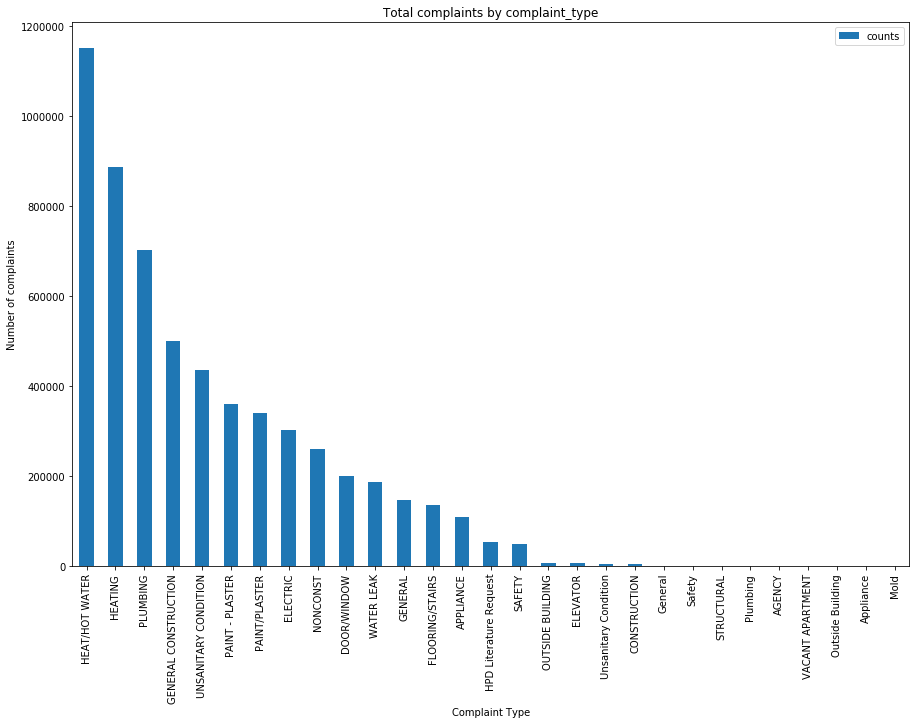

In [12]:
r = df_plot.plot(kind='bar', figsize=(15, 10))
plt.title('Total complaints by complaint_type')
plt.ylabel('Number of complaints')
plt.xlabel('Complaint Type')

Now lets have an alternate look at the data by plotting as a __pie chart__.  

First build a dataframe to make the plot clearer.

In [11]:
top_15_df = complaints_df[:15].copy()
rest_df = pd.DataFrame(data = {
    'complaint_type' : ['OTHER COMPLAINTS'],
    'counts' : [complaints_df['counts'][15:].sum()]
})
to_plt_df = pd.concat([top_15_df, rest_df])


Now plot the new dataframe as a pie chart.

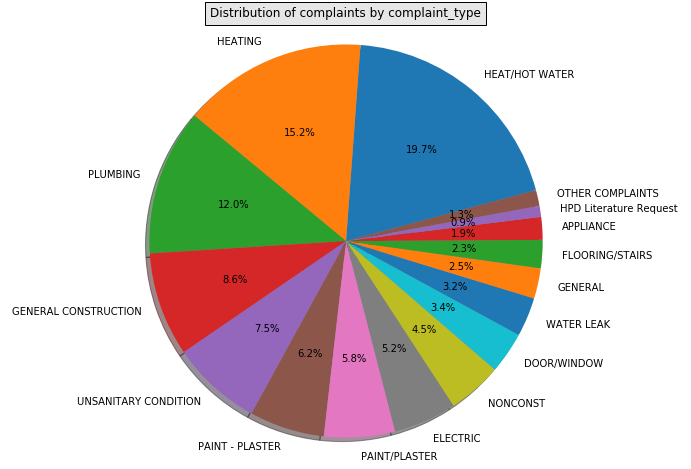

In [12]:
fig1, ax1 = plt.subplots(figsize = (12,8))
ax1.pie(to_plt_df['counts'], labels=to_plt_df['complaint_type'], autopct='%1.1f%%',
        shadow=True, startangle=15,)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title("Distribution of complaints by complaint_type", bbox={'facecolor':'0.9', 'pad':5})

plt.show()

### Conclusion
Using the groupby we were able to count the number of complaints by __complaint_type__  
This showed that __HEAT/HOT WATER__ was the most frequent comlaint, followed by __HEATING__.

Using the bar chart we can see that certain complaint_type values dominate the number of complaints.  
This is even more revealing using the __pie chart__ where we can clearly see that __HEAT/HOT WATER, HEATING__ and __PLUMBING__ make up __48%__ of all complaints.  

This shows where the relevant authoritie should start investigating further.